# Content

1. Importing libraries and data
2. Customer Profiling
    a. Age grouping
    b. Income grouping
    c. Dependent grouping
3. Unique Variables in Department Column
4. Time of day breakdown
5. Additional visualizations and analysis
6. Exporting Final Data Set & Visualizations

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data

In [2]:
# define path

path = r'C:\Users\13526\Documents\Instacart Basket Analysis'

In [5]:
df3 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'reg_activity_customers.pkl'))

### Customer Profiling

The following data manipulations will be using the new df3 data frame that contains only \"regular activity customers,\" which is defined by having >= 5 orders.

In [7]:
# using .loc to create a profiling variable based on age of customers

df3.loc[(df3['age'] >= 18) & (df3['age'] <= 35), 'age_range'] = '1'
df3.loc[(df3['age'] > 35) & (df3['age'] < 60), 'age_range'] = '2'
df3.loc[(df3['age'] >= 60), 'age_range'] = '3'
df3['age_range'].value_counts()

2    12190559
3    11066662
1     9145936
Name: age_range, dtype: int64

Most customers are between 36 and 59 years old and fall into the \"Adult\" age range.
The Senior age range of older than 60 accounts for the least amount of customers

### Income Grouping
- Less than 50,000 = Low Income
- Between 50,000 & 120,000 = Middle Income
- Above 120,000 = High Income

In [10]:
# create income flags

df3.loc[df3['income']<50000, 'income_flag'] = 'Low Income'
df3.loc[(df3['income']>=50000) & (df3['income']<=120000), 'income_flag'] = 'Middle Income'
df3.loc[df3['income']>120000, 'income_flag'] = 'High Income'
df3['income_flag'].value_counts(dropna = False)

Middle Income    19239113
High Income       9570916
Low Income        3593128
Name: income_flag, dtype: int64

The majority of customers fall within the Middle Income bracket making between 50,000 and 120,000.

## Dependent Grouping 
- Customers with 0 dependents = no dependents 
- Customers with 1 or more dependents = has dependent

In [13]:
# Create flags for customers with no dependants 

df3.loc[df3['#_of_dependants']== 0, 'dependent_flag'] = 'No Dependents'
df3.loc[df3['#_of_dependants'] > 0, 'dependent_flag'] = 'Has Dependent'

In [15]:
# Check values of column

df3['dependent_flag'].value_counts()

Has Dependent    24306052
No Dependents     8097105
Name: dependent_flag, dtype: int64

In [17]:
# aggregate dependent expenditure

df3.groupby('dependent_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
dependent_flag                         
Has Dependent   11.930823  1.0  99999.0
No Dependents   12.117107  1.0  99999.0

It appears that there isn't much difference between the expenditure of customers with or without dependents. Customers with no dependents spend slightly more on average.

### Unique Variables in department column

In [18]:
# Import department

dep=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [19]:
# Create data dictionary for department id

zipped=zip(dep['Unnamed: 0'], dep['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [20]:
# Map  department names to department id in dataframe

df3['department'] = df3['department_id'].map(data_dict)
df3.head()

,product_id,product_name,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,...,marital_status,income,Region,Total_orders,Activity_flag,age_range,income_flag,Income_flag,dependent_flag,department
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.000000,...,married,49620,Midwest,148,Regular Activity,3,Low Income,NaN,Has Dependent,snacks
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.000000,...,married,49620,Midwest,148,Regular Activity,3,Low Income,NaN,Has Dependent,snacks
2,907,Premium Sliced Bacon,12,20.0,3160996,138,1,5,13,1.110352,...,married,49620,Midwest,148,Regular Activity,3,Low Income,NaN,Has Dependent,meat seafood
3,907,Premium Sliced Bacon,12,20.0,2254091,138,10,5,14,6.000000,...,married,49620,Midwest,148,Regular Activity,3,Low Income,NaN,Has Dependent,meat seafood
4,1000,Apricots,10,12.9,505689,138,9,6,12,7.000000,...,married,49620,Midwest,148,Regular Activity,3,Low Income,NaN,Has Dependent,bulk


In [21]:
# Create subset for customers who have purchased pet products

pet_parents=df3.loc[df3['department']=='pets']

In [22]:
pet_parents.head()

,product_id,product_name,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,...,marital_status,income,Region,Total_orders,Activity_flag,age_range,income_flag,Income_flag,dependent_flag,department
262,24321,Mini's Flavor Dog Snacks,8,8.2,2322397,709,5,1,21,8.0,...,married,158302,Northeast,192,Regular Activity,3,High Income,NaN,Has Dependent,pets
315,40403,Fancy Feast Seafood Feast Variety Classic Wet ...,8,6.3,1331431,709,3,6,15,6.0,...,married,158302,Northeast,192,Regular Activity,3,High Income,NaN,Has Dependent,pets
14144,12793,Canine Cuisine Gourmet Filet Mignon New York S...,8,2.6,2719241,23513,17,0,7,7.0,...,married,55044,West,385,Regular Activity,2,Middle Income,Middle Income,Has Dependent,pets
17019,5743,ProActive Health Large Breed Adult Dog Food,8,1.1,3162880,29911,4,4,16,3.0,...,divorced/widowed,135803,Northeast,57,Regular Activity,3,High Income,NaN,No Dependents,pets
20931,3939,MarroBone Real Beef Flavor Dog Care & Treats,8,6.1,753238,38457,21,3,8,1.0,...,married,118718,West,249,Regular Activity,2,Middle Income,Middle Income,Has Dependent,pets


In [23]:
# aggregating for pet parent expenditure

pet_parents.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
department                     
pets        7.889181  1.0  15.0

In [24]:
# Create subset for customers who have purchased baby products

parents=df3.loc[df3['department']=='babies']

In [25]:
parents.head()

,product_id,product_name,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,...,marital_status,income,Region,Total_orders,Activity_flag,age_range,income_flag,Income_flag,dependent_flag,department
8279,9356,Swaddlers Size 2 Diapers,18,12.1,984114,15954,5,0,20,22.0,...,married,149863,Midwest,68,Regular Activity,3,High Income,NaN,Has Dependent,babies
21729,6042,No More Tangles Leave-in Conditioner,18,4.2,2360653,39145,5,0,17,0.0,...,married,47143,South,215,Regular Activity,1,Low Income,NaN,Has Dependent,babies
26835,18334,Baby Oil,18,9.4,3011132,50640,5,6,6,10.0,...,single,84195,West,311,Regular Activity,1,Middle Income,Middle Income,No Dependents,babies
26836,18334,Baby Oil,18,9.4,1234307,50640,14,3,13,9.0,...,single,84195,West,311,Regular Activity,1,Middle Income,Middle Income,No Dependents,babies
26837,18334,Baby Oil,18,9.4,379257,50640,24,0,13,8.0,...,single,84195,West,311,Regular Activity,1,Middle Income,Middle Income,No Dependents,babies


In [26]:
#aggregating for parent expenditure

parents.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
department                     
babies      7.638374  1.0  15.0

In [27]:
# checking what department customers spend the most in sales

df3[['prices', 'department']].groupby('department').agg('sum').sort_values(by ='prices', ascending=False)

,prices
department,
dairy eggs,1.806446e+08
produce,7.565692e+07
beverages,2.064114e+07
frozen,1.728779e+07
pantry,1.501939e+07
snacks,1.234440e+07
meat seafood,1.155080e+07
bakery,9.207464e+06
deli,8.176976e+06


Customers spent the most money on dairy and eggs and the least on the department labeled 'other'

### Time of day breakdown
- 12:00 am - 05:59 am = Early morning
- 06:00 am - 11:59 pm = Morning
- 12:00 pm - 04:59 pm = Afternoon
- 05:00 pm - 08:59 pm = Evening
- 08:59 pm - 11:59 pm = Night

In [29]:
# Create a dataframe that lists just orders without any duplicates

df_ord = df3.drop_duplicates(subset='order_id').copy()

In [30]:
df_ord.shape

(3212144, 36)

In [32]:
# Create list of break down of day

df_ord.loc[(df_ord['order_hour_of_day'] > 0) & (df_ord['order_hour_of_day'] < 6), 'time_of_day'] = 'Early_morning'
df_ord.loc[(df_ord['order_hour_of_day'] >= 6) & (df_ord['order_hour_of_day'] < 12), 'time_of_day'] = 'Morning'
df_ord.loc[(df_ord['order_hour_of_day'] >= 12) & (df_ord['order_hour_of_day'] < 17), 'time_of_day'] = 'Afternoon'
df_ord.loc[(df_ord['order_hour_of_day'] >= 17) & (df_ord['order_hour_of_day'] < 21), 'time_of_day'] = 'Evening'
df_ord.loc[(df_ord['order_hour_of_day'] >= 21) & (df_ord['order_hour_of_day'] < 24), 'time_of_day'] = 'Night'
df_ord['time_of_day'].value_counts()

Afternoon        1303937
Morning          1066187
Evening           614368
Night             168428
Early_morning      37878
Name: time_of_day, dtype: int64

Most orders are places during the Afternoon between 12:00 pm - 04:59 pm. The slowest time of day is in the Early Morning between 12:00 am - 05:59 am.

## Additional visualizations and analysis

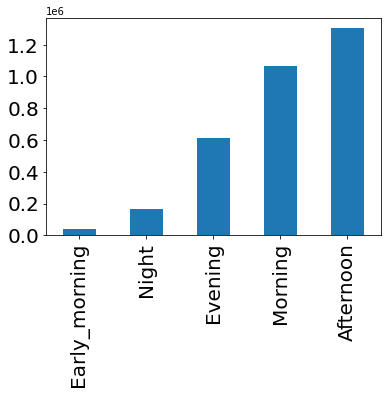

In [34]:
# Create bar graph displaying time of day when most orders are placed

time_of_day_orders=df_ord['time_of_day'].value_counts().sort_values().plot.bar(fontsize=20)

The majority of orders are placed in the morning or afternoon hours between 6 am and 4:59 pm

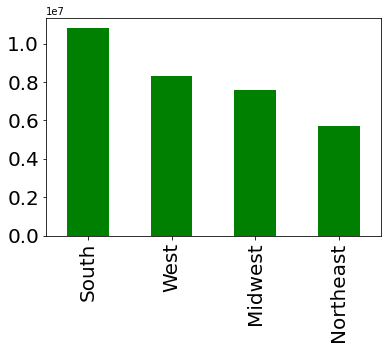

In [35]:
#regional distribution of customers

regional_bar=df3['Region'].value_counts().plot.bar(color='green', fontsize=20)

The South has the most customers and the Northeast has the least

In [52]:
# 100% stacked bar chart for regional income distribution
# creating crosstab for region and income flag

income_region = pd.crosstab(index=df3['Region'], columns=df3['Income_flag'], normalize="index")

In [53]:
# creating cross tab to display labels

income_region_labels = pd.crosstab(index=df3['Region'],columns=df3['income_flag'])

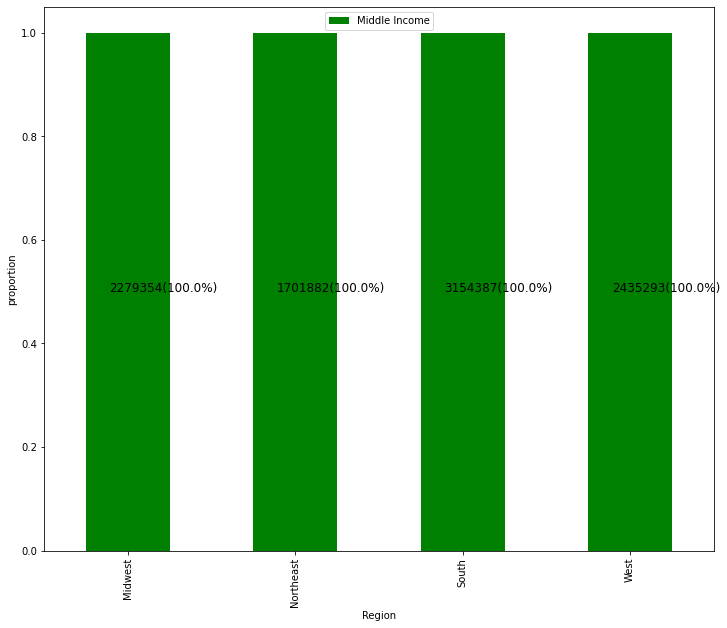

In [60]:
# plotting chart

income_regional_dist=income_region.plot(kind='bar', stacked=True, color=['green','yellow','blue'], figsize=(12,10))
plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("Region")
for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                          income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                  s=f'{count}({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12)

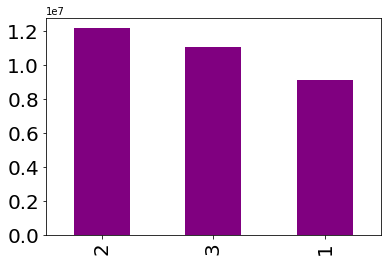

In [48]:
#creating bar chart for orders made by each age group

age_bar=df3['age_range'].value_counts().plot.bar(color='purple',fontsize=20)

- Age range 1 = Young Adult  >= 18 & <35
- Age range 2 = Adult >=35 & <60
- Age range 3 = Senior >= 60

Most customers are between 36 and 59 years old and fall into the "Adult" age range. The Senior age range of older than 60 accounts for the least amount of customers.

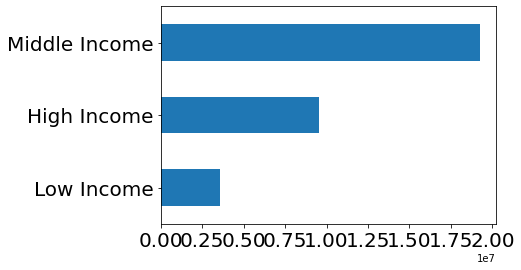

In [50]:
#bar chart for orders made by each income group

income_bar=df3['income_flag'].value_counts().sort_values().plot.barh(fontsize=20)

- Less than 50,000 = Low Income
- Between 50,000 & 120,000 = Middle Income
- Above 120,000 = High Income

Most customers fall within the middle income bracket

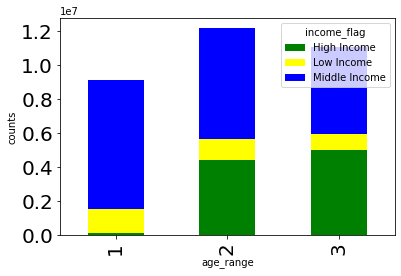

In [55]:
# stacked bar chart for age groups and income groups

age_income_bar=df3.groupby('age_range')['income_flag'].value_counts().unstack().plot.bar(stacked=True, ylabel='counts',color=['green','yellow','blue'], fontsize=20)

- Age range 1 = Young Adult >= 18 & <35
- Age range 2 = Adult >=35 & <60
- Age range 3 = Senior >= 60

Young Adults have the most middle income customers and the least high income customers

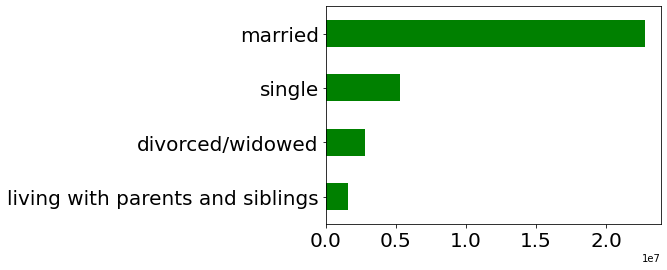

In [58]:
#bar chart showing the orders made by customers of each family status

marital_bar=df3['marital_status'].value_counts().sort_values().plot.barh(color='green', fontsize=20)

Most purchases are made by customers that are married. The least are made by customers living with parents and siblings

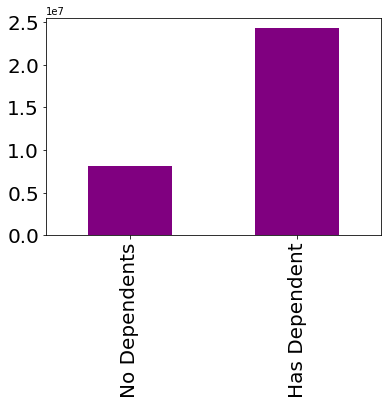

In [59]:
#bar chart showing the amount of orders made by customers in each dependent flag

dependent_bar=df3['dependent_flag'].value_counts().sort_values().plot.bar(color='purple', fontsize=20)

Most customers have dependents

In [77]:
#defining function to show labels on charts

def show_values(axs, orient= "v", space=.01):
         def _single(ax):
            if orient == "v":
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                    value = '{:.1f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha= "center")
            elif orient == "h":
                              for p in ax.patches:  
                                    _x = p.get_x() + p.get_width() + float(space)
                                    _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                                    value = '{:.1f}'.format(p.get_width())
                                    ax.text(_x, _y, value, ha= "left")
            if isinstance(axs, np.ndarray):
                for idx, ax in np.ndenumerate(axs):
                    _single(axs)
            else:
                    _single(axs)

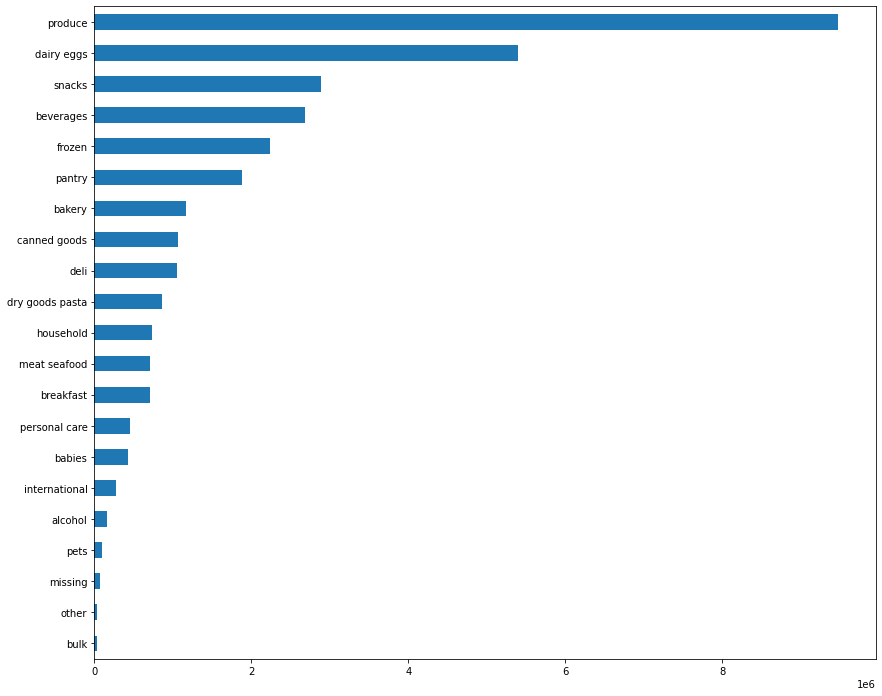

In [78]:
# bar chart showing the orders made for each department

department_bar=df3.department.value_counts().sort_values().plot(kind = 'barh', figsize=[14,12])
show_values(department_bar, "h", space=0)

The most orders have been placed from the produce department and the least from the bulk department

In [80]:
# creating subset with userid and loyalty columns
cust_loyalty=df3[['customer_id','loyalty_flag']]

# removing duplicate values
cust_loyalty_unique=cust_loyalty.drop_duplicates()

In [81]:
cust_loyalty_unique['loyalty_flag'].value_counts()

New customer        111529
Regular customer     76864
Loyal Customer       17017
Name: loyalty_flag, dtype: int64

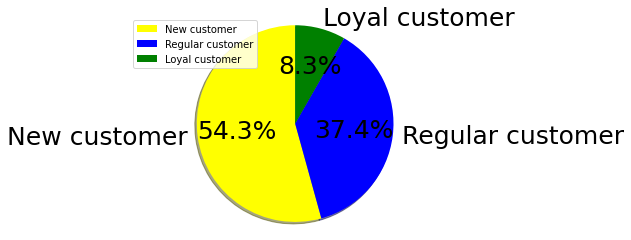

In [83]:
# pie chart for loyalty flag
labels = 'New customer', 'Regular customer', 'Loyal customer'
sizes = cust_loyalty_unique['loyalty_flag'].value_counts()
colors = ['yellow','blue','green']
textprops = {"fontsize":25}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')
plt.legend()
plt.show()

# Exporting Final Data Set & Visualizations

In [84]:
# exporting final dataset
df3.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_dataset.pkl'))

In [85]:
# export loyalty Pie Chart
loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_dist_pie.png'))

In [86]:
# export department bar chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

In [87]:
# export bar chart showing the amount of orders made by customers in each dependent flag
dependent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_bar.png'))

In [88]:
# export bar chart showing the orders made by customers of each family status
marital_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_bar.png'))

In [89]:
# export stacked bar chart for age groups and income groups
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_stacked.png'))

In [90]:
# export bar chart for orders made by each income group
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'))

In [91]:
# export bar chart for orders made by each age group
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))

In [93]:
# export stacked bar chart for income and region
income_regional_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_regional_dist.png'))

In [94]:
# export regional distribution of customers
regional_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_regional_dist.png'))

In [95]:
# export bar graph displaying time of day when most orders are placed
time_of_day_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_of_day_orders.png'))